<a href="https://colab.research.google.com/github/IvanUlloa098/simulacion/blob/main/prueba_1/Prueba_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba 1
##Iván Ulloa

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.express as px

In [ ]:
archivo = files.upload()

Saving ranking.csv to ranking.csv


In [31]:
df = pd.read_csv(io.StringIO(archivo['ranking.csv'].decode('utf-8')))
df.head()

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1,0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2,0,3,1,...,"221,893","3,509,949","3,577,970","18,949,015,666","17,928,760,492","3,688,293,052","3,699,748,891","588,975,950","667,872,172",NaN
1,2,2,0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45,42,17,19,...,"4,339,679","796,827","945,874","6,417,335,168","6,436,090,837","1,878,733,441","1,955,377,497","127,087,663","190,328,750",NaN
2,3,3,0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4,5,20,3,...,"1,617,778",0,0,"3,448,646,302","3,343,835,273","2,427,005,282","2,314,556,018","144,524,011","139,310,219",NaN
3,4,5,1,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2,0,9,0,...,"86,918","4,785,739","5,678,838","6,014,463,154","5,334,073,117","784,042,300","791,999,072","206,200,661","234,359,513",NaN
4,5,4,-1,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8,0,0,0,...,"237,591",0,0,"3,286,786,210","3,616,608,480","2,426,480,097","2,305,837,270","202,204,211","152,342,627",NaN


In [33]:
ranking_up = df[df['Variación Ranking Tamaño 2020 - 2021'] > 0]
ranking_keep = df[df['Variación Ranking Tamaño 2020 - 2021'] == 0]
ranking_down = df[df['Variación Ranking Tamaño 2020 - 2021'] < 0]

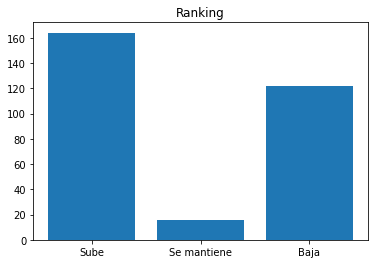

In [35]:
etiquetas = ['Sube', 'Se mantiene', 'Baja']
valores = [ranking_up.shape[0], ranking_keep.shape[0], ranking_down.shape[0]]
plt.figure()
plt.title('Ranking')
barras = plt.bar(etiquetas, valores)

plt.show()

In [ ]:
panama = files.upload()

Saving panama.csv to panama.csv


In [ ]:
panama = df[df['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)'] > 0]
no_panama = df[df['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)'] == 0]

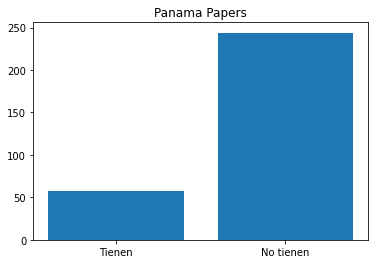

In [ ]:
etiquetas = ['Tienen', 'No tienen']
valores = [panama.shape[0], no_panama.shape[0]]
plt.figure()
plt.title('Panama Papers')
barras = plt.bar(etiquetas, valores)

plt.show()

In [65]:
low = df[df['Total Patrimonio (7) 2020'].str.replace(',', '').astype(float) < 10000000].count()[0]
mid = df[(df['Total Patrimonio (7) 2020'].str.replace(',', '').astype(float) > 10000000) & (df['Total Patrimonio (7) 2020'].str.replace(',', '').astype(float) < 100000000)].count()[0]
high = df[df['Total Patrimonio (7) 2020'].str.replace(',', '').astype(float) > 500000000].count()[0]

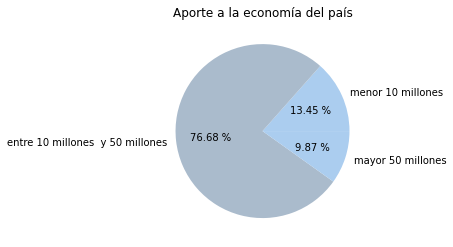

In [67]:
plt.figure()

etiquetas = ['menor 10 millones', 'entre 10 millones  y 50 millones', 'mayor 50 millones']
colores = ['#abcdef', '#aabbcc']
plt.pie([low, mid, high], labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Aporte a la economía del país')
plt.show()

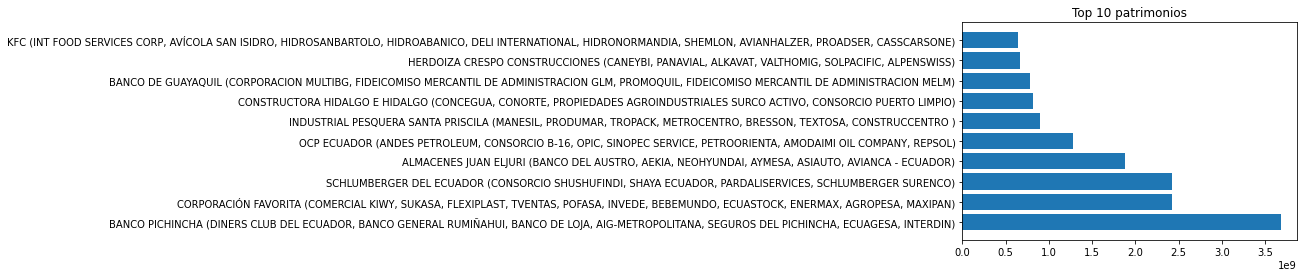

In [92]:
patrimonios = df.nlargest(n=10, columns=['Total Patrimonio (7) 2020'])

etiquetas = patrimonios['\nNombre Grupo Económico']
valores = patrimonios['Total Patrimonio (7) 2020']
plt.figure()
plt.title('Top 10 patrimonios')
barras = plt.barh(etiquetas, valores)

plt.show()

**Conclusiones**
Tener una herramienta que visualice datos importantes puede destacar ciertas características que no se encontraban a simple vista en una tabla. Se puede visualizar que el ranking de las empresas va en aumento, que algunas empresas tienen empresas offshore, que los ingresos en el país son más grandes de los anticipados por etas empresas y podemos ver cueles de estas empresas aportan más a la economía visualizando el patrimonio de cada una del Top 10.

**Recomendaciones**
La utilización de Pandas en Python para el tratado de información es vital al contener un sin número de herramientas importantes.